In [1]:
from __future__ import division
from sys import exit
from math import sqrt
from scipy.optimize import fmin_l_bfgs_b
import os
from numpy import array
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load dataset
df = pd.read_csv('dataset/dataset.csv')
# df.head()

In [3]:
df = pd.DataFrame(df)
df.head()

,time,KORIDOR 1,KORIDOR 2,KORIDOR 3,KORIDOR 4,KORIDOR 5,KORIDOR 6,KORIDOR 7,KORIDOR 8,KORIDOR 9,KORIDOR 10,KORIDOR 11,KORIDOR 12
0,17-Jan,2036785,607830,851314,510794,831301,847222,782386,778860,1209820,577798,235949,163190
1,17-Feb,1807291,532369,765433,462510,706965,769846,669715,713028,1116693,520761,215517,148744
2,17-Mar,2080351,628796,896030,592404,831005,932833,765291,810981,1226031,613180,249833,178268
3,17-Apr,1921310,594534,846755,526514,756120,837117,699967,731000,1095176,555744,233072,167430
4,17-May,2008194,610336,880025,562360,773419,892283,736200,761373,1166608,589174,239869,176003


In [4]:
df = df.interpolate(method ='linear', limit_direction ='forward')
df.head()

,time,KORIDOR 1,KORIDOR 2,KORIDOR 3,KORIDOR 4,KORIDOR 5,KORIDOR 6,KORIDOR 7,KORIDOR 8,KORIDOR 9,KORIDOR 10,KORIDOR 11,KORIDOR 12
0,17-Jan,2036785,607830,851314,510794,831301,847222,782386,778860,1209820,577798,235949,163190
1,17-Feb,1807291,532369,765433,462510,706965,769846,669715,713028,1116693,520761,215517,148744
2,17-Mar,2080351,628796,896030,592404,831005,932833,765291,810981,1226031,613180,249833,178268
3,17-Apr,1921310,594534,846755,526514,756120,837117,699967,731000,1095176,555744,233072,167430
4,17-May,2008194,610336,880025,562360,773419,892283,736200,761373,1166608,589174,239869,176003


In [5]:
# parsing dataframe
data = df[["time", " KORIDOR 1 "]]
data.head()

,time,KORIDOR 1
0,17-Jan,2036785
1,17-Feb,1807291
2,17-Mar,2080351
3,17-Apr,1921310
4,17-May,2008194


In [6]:
# konversi dataframe ke list
dataset = data[" KORIDOR 1 "]
dataset = dataset[:36].values.tolist()

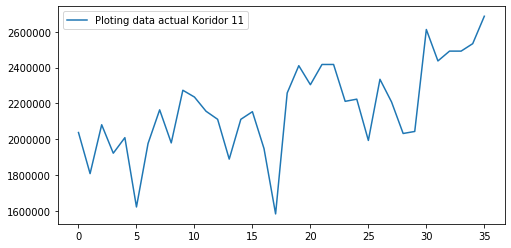

In [7]:
# ploting data
koridor = dataset

plt.figure(figsize=(8,4))
plt.plot(koridor, label='Ploting data actual Koridor 11')
plt.legend(loc='best')
plt.show()

In [8]:
# inisiasi nilai
m = 12        # periode musiman
fc = 12       # jumlah hasil yang diprediksi
alpha = None  # konstanta pemulusan
beta = None   # konstanta pemulusan
gamma = None  # konstanta pemulusan

## Training

In [9]:
# parsing untuk data training
Y = dataset[:24]

In [10]:
# fungsi untuk evaluasi model dalam proses training

def RMSE(params, *args):

    Y = args[0]
    type = args[1]
    rmse = 0
    alpha, beta, gamma = params
    m = args[2]
    a = [sum(Y[0:m]) / float(m)]                         
    b = [(sum(Y[m:2 * m]) - sum(Y[0:m])) / m ** 2]

    if type == 'multiplicative':
            
        s = [Y[i] / a[0] for i in range(m)]              
        y = [(a[0] + (b[0]  * m)) * s[0]]

        for i in range(len(Y)):
            a.append(alpha * (Y[i] / s[i]) + (1 - alpha) * (a[i] + b[i]))      
            b.append(beta * (a[i + 1] - a[i]) + (1 - beta) * b[i])            
            s.append(gamma * (Y[i] / a[i + 1]) + (1 - gamma) * s[i])     
            y.append((a[i + 1] + (b[i + 1] * m)) * s[i + 1])                   

    rmse = sqrt(sum([(m - n) ** 2 for m, n in zip(Y, y[:-1])]) / len(Y))
    
    return rmse


In [11]:
if (alpha == None or beta == None or gamma == None):

    initial_values = array([0.0, 0.0, 0.0])
    boundaries = [(0, 1), (0, 1), (0, 1)]
    type = 'multiplicative'

    #optimize konstanta pemulusan menggunakan scipy optimizer
    parameters = fmin_l_bfgs_b(RMSE, x0 = initial_values, args = (Y, type, m), bounds = boundaries, approx_grad = True)
    alpha, beta, gamma = parameters[0]

a = [sum(Y[0:m]) / float(m)]
b = [(sum(Y[m:2 * m]) - sum(Y[0:m])) / m ** 2]
s = [Y[i] / a[0] for i in range(m)]
y = [(a[0] + (b[0] * m)) * s[0]]
rmse = 0

In [12]:
print("inisiasi pemulusan level ", a)
print("=================")
print("inisiasi pemulusan trend ", b)
print("=================")
print("inisiasi pemulusan seasonal ", s)
print("=================")
print("alpha ", alpha)
print("=================")
print("beta ", beta)
print("=================")
print("gamma ", gamma)
print("=================")
print("y ", y)

inisiasi pemulusan level  [2021421.5]
inisiasi pemulusan trend  [10779.715277777777]
inisiasi pemulusan seasonal  [1.0076003446089794, 0.8940693467443579, 1.0291525048091157, 0.9504747030740496, 0.9934563375327709, 0.8018911444248515, 0.9774755042429301, 1.0703096805886352, 0.978953671958075, 1.1244690926657306, 1.1056936912959519, 1.066453978054552]
alpha  0.02697691019898073
beta  0.6638927577143453
gamma  0.0
y  [2167124.737944107]


In [13]:
for i in range(len(Y)):
    a.append(alpha * (Y[i] / s[i]) + (1 - alpha) * (a[i] + b[i]))      
    b.append(beta * (a[i + 1] - a[i]) + (1 - beta) * b[i])            
    s.append(gamma * (Y[i] / a[i + 1]) + (1 - gamma) * s[i])      
    y.append((a[i + 1] + (b[i + 1] * m)) * s[i + 1])                   

rmse = sqrt(sum([(m - n) ** 2 for m, n in zip(Y[:-fc], y[:-fc - 1])]) / len(Y[:-fc]))
rmse

127087.34514184216

In [14]:
print("alpha ", alpha)
print("beta ", beta)
print("gamma ", gamma)
print("rmse ", rmse)

alpha  0.02697691019898073
beta  0.6638927577143453
gamma  0.0
rmse  127087.34514184216


In [15]:
# hasil training

actual = pd.DataFrame(Y[:24])
level = pd.DataFrame(a[1:])
trend = pd.DataFrame(b[1:])
seasonal = pd.DataFrame(s[12:])
predict = pd.DataFrame(y[1:])

df = pd.DataFrame(np.c_[actual, level, trend, seasonal, predict], columns=[r'$y_t$',r'$l_t$',r'$b_t$',r'$s_t$',r'$\hat{y}_t$'],index=actual.index)
df

,$y_t$,$l_t$,$b_t$,$s_t$,$\hat{y}_t$
0,2036785.0,2.031910e+06,10586.652999,1.007600,1.930251e+06
1,1807291.0,2.041929e+06,10209.194368,0.894069,2.227538e+06
2,2080351.0,2.051309e+06,9659.074027,1.029153,2.059886e+06
3,1921310.0,2.059901e+06,8950.802388,0.950475,2.153129e+06
4,2008194.0,2.067573e+06,8101.330870,0.993456,1.735925e+06
5,1620960.0,2.074210e+06,7129.682452,0.801891,2.111119e+06
6,1975890.0,2.079724e+06,6056.555097,0.977476,2.303737e+06
7,2163547.0,2.084044e+06,4903.905860,1.070310,2.097791e+06
8,1978878.0,2.087126e+06,3694.523687,0.978954,2.396761e+06
9,2273026.0,2.088949e+06,2451.598818,1.124469,2.342266e+06


## Testing

In [16]:
Y = dataset[24:]
len(Y)

12

In [17]:
for i in range(len(Y) + fc):
    
    if i == len(Y):
        Y.append((a[-1] + (b[-1] * m)) * s[-m])
        
    a.append(alpha * (Y[i] / s[i+35]) + (1 - alpha) * (a[i+24] + b[i+24]))      
    b.append(beta * (a[i + 25] - a[i+24]) + (1 - beta) * b[i+24])            
    s.append(gamma * (Y[i] / a[i + 25]) + (1 - gamma) * s[i+35])      
    y.append((a[i + 25] + (b[i + 25] * m)) * s[i + 36])  

In [18]:
print("alpha ", alpha)
print("beta ", beta)
print("gamma ", gamma)
print("rmse ", rmse)

alpha  0.02697691019898073
beta  0.6638927577143453
gamma  0.0
rmse  127087.34514184216


In [19]:
# hasil testing

actual = pd.DataFrame(Y[:12])
level = pd.DataFrame(a[25:37])
trend = pd.DataFrame(b[25:37])
seasonal = pd.DataFrame(s[36:48])
predict = pd.DataFrame(y[:12])

df = pd.DataFrame(np.c_[actual, level, trend, seasonal, predict], columns=[r'$y_t$',r'$l_t$',r'$b_t$',r'$s_t$',r'$\hat{y}_t$'],index=actual.index)
df

,$y_t$,$l_t$,$b_t$,$s_t$,$\hat{y}_t$
0,2223257.0,2.151173e+06,8441.027582,1.066454,2.167125e+06
1,1992685.0,2.151761e+06,3227.513371,1.066454,1.930251e+06
2,2334201.0,2.155899e+06,3832.178373,1.066454,2.227538e+06
3,2207527.0,2.157310e+06,2224.564800,1.066454,2.059886e+06
4,2031443.0,2.152664e+06,-2336.634737,1.066454,2.153129e+06
5,2042807.0,2.143993e+06,-6542.094278,1.066454,1.735925e+06
6,2612456.0,2.145873e+06,-950.385805,1.066454,2.111119e+06
7,2436733.0,2.148699e+06,1556.446440,1.066454,2.303737e+06
8,2491625.0,2.155276e+06,4889.619726,1.066454,2.097791e+06
9,2491625.0,2.164919e+06,8045.302306,1.066454,2.396761e+06


## Evaluasi akurasi model

In [20]:
y_true = dataset[24:36]
y_pred = y[25:37]

In [21]:
def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [22]:
mape = MAPE(y_true, y_pred)
print("MAPE is ", mape)

MAPE is  6.995567533560874


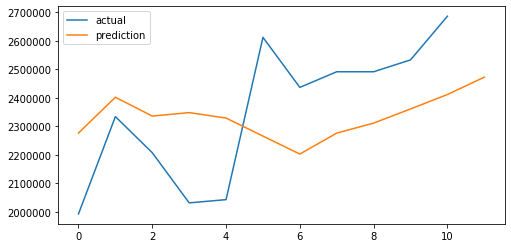

In [23]:
# ploting perbandingan hasil prediction dan actual
a = dataset[25:37]
b = y[24:36]

plt.figure(figsize=(8,4))
plt.plot(a, label='actual')
plt.plot(b, label='prediction')
plt.legend(loc='best')
plt.show()

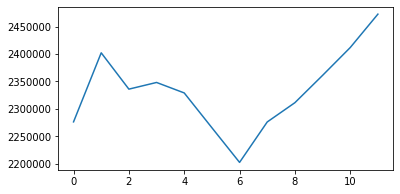

In [26]:
# ploting perbandingan hasil prediction dan actual
b = y[24:36]

plt.figure(figsize=(6,3))
plt.plot(b)
plt.show()

## Contoh grafik jenis exponential smoothing

       Contoh grafik single exponential smoothing


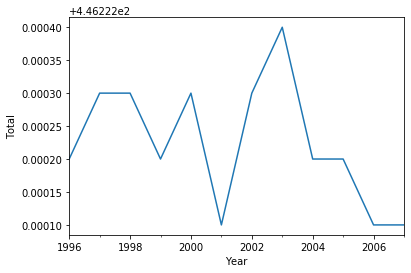

In [57]:
data = [446.2222,  446.2223,  446.2223 ,  446.2222,  446.2223,  446.2221, 446.2223,  446.2224,  446.2222,  446.2222 ,  446.2221,  446.2221]
index= pd.date_range(start='1996', end='2008', freq='A')
oildata = pd.Series(data, index)

ax=oildata.plot()
ax.set_xlabel("Year")
ax.set_ylabel("Total")
print("       Contoh grafik single exponential smoothing")

Contoh grafik double exponential smoothing


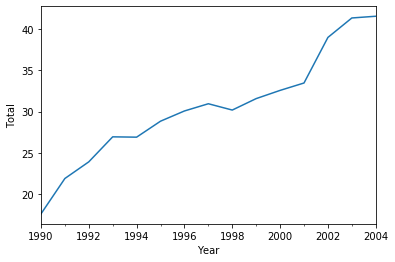

In [25]:
data = [17.5534,  21.86  ,  23.8866,  26.9293,  26.8885,  28.8314, 30.0751,  30.9535,  30.1857,  31.5797,  32.5776,  33.4774, 39.0216,  41.3864,  41.5966]
index= pd.date_range(start='1990', end='2005', freq='A')
air = pd.Series(data, index)

ay=air.plot()
ay.set_xlabel("Year")
ay.set_ylabel("Total")
print("Contoh grafik double exponential smoothing")

Contoh grafik triple exponential smoothing


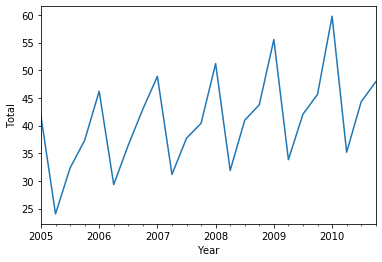

In [26]:
data = [41.7275,  24.0418,  32.3281,  37.3287,  46.2132,  29.3463, 36.4829,  42.9777,  48.9015,  31.1802,  37.7179,  40.4202, 51.2069,  31.8872,  40.9783,  43.7725,  55.5586,  33.8509, 42.0764,  45.6423,  59.7668,  35.1919,  44.3197,  47.9137]
index= pd.date_range(start='2005', end='2010-Q4', freq='QS-OCT')
aust = pd.Series(data, index)

az=aust.plot()
az.set_xlabel("Year")
az.set_ylabel("Total")
print("Contoh grafik triple exponential smoothing")